In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt

In [5]:
'''cell only for reading time labels'''
from toolbox.methods import train_main_ori, read_data

all_epochs, all_rawdata = read_data(amount_of_subjects=1,
                        task='main',
                        resample=False,
                        resample_frequency=20
                        )
time_labels = all_epochs[0].times

In [58]:
resp_50hz = np.load('resp_50hz_2.npy', allow_pickle=True)
resp_50hz_shuffled = np.load('resp_50hz_shuffled.npy', allow_pickle=True)

In [59]:
df_resp = pd.DataFrame(columns=range(26))
for i in range(26):
    df_resp[i] = resp_50hz[i]

df_resp_shuffled = pd.DataFrame(columns=range(26))
for i in range(26):
    df_resp_shuffled[i] = resp_50hz_shuffled[i]

In [60]:
df_resp['mean'] = df_resp.mean(axis=1)
df_resp['mean_filtered'] = gaussian_filter(df_resp['mean'], sigma=5)

df_resp_shuffled['mean'] = df_resp_shuffled.mean(axis=1)
df_resp_shuffled['mean_filtered'] = gaussian_filter(df_resp_shuffled['mean'], sigma=5)


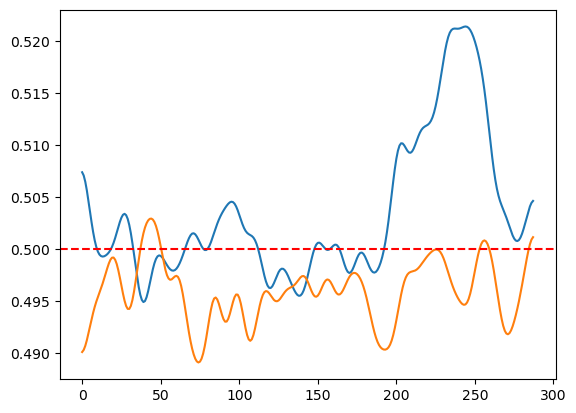

In [61]:
plt.plot(df_resp['mean_filtered'])
plt.plot(df_resp_shuffled['mean_filtered'])
plt.axhline(y=0.5, color='r', linestyle='--')